# Market Basket Analysis of DataCo 
## Data Co practice Dataset


### Intro

A market basket analysis is effective for identifying customer behaviors. It uses a technique called associated rule learning for Data Mining. It involves analyzing transactional data to identify the relationships between products that are frequently purchased together. By analyzing these associating we can recommend store layout plans to optimizing purchasing items or to cross sell and upsell products based on what is being purchased!

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='ISO-8859-1') 
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [3]:
df['Product Card Id'].value_counts()

365     24515
403     22246
502     21035
1014    19298
1004    17325
        ...  
127        27
208        15
860        11
226        10
60         10
Name: Product Card Id, Length: 118, dtype: int64

In [4]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

#### Clean and Subset

In this analysis we will not need most of the data provided in this dataframe. Firstly we can subset the data. Next we can clean up the column names to make them easier to call andf manipulate.

In [6]:
# clean the names of the dataset and subset to get the require columns
mark_df = df[['Order Id', 'Product Card Id', 'Product Name']]
mark_df.columns = [col.lower().replace(' ', '_') for col in mark_df.columns]
mark_df.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)
mark_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   order_id         180519 non-null  int64 
 1   product_card_id  180519 non-null  int64 
 2   product_name     180519 non-null  object
dtypes: int64(2), object(1)
memory usage: 4.1+ MB


/var/folders/nf/vsypdynx6l5bkkj3kvftrpz80000gn/T/ipykernel_87876/2475476383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mark_df.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)


In [7]:
mark_df.head(n = 10).sort_values('order_id')

,order_id,product_card_id,product_name
9,75931,1360,Smart watch
8,75932,1360,Smart watch
7,75933,1360,Smart watch
6,75934,1360,Smart watch
5,75935,1360,Smart watch
4,75936,1360,Smart watch
3,75937,1360,Smart watch
2,75938,1360,Smart watch
1,75939,1360,Smart watch
0,77202,1360,Smart watch


#### Market Basket Set Up

To be able to analyze the data we need to find all the items that were purchased together at the same time. To do that we can group by the unique Order Id and list all the product sold in that transaction.

After that we need to create a VERY wide dataframe. Each row will become a transaction observation and the feratures or columns will hold a product as binary representation to indicate whether a product was purchased. This procedure is called one hot encoding.

In [8]:
# Group Dataframe by order # and convert to a list of list via a dictionary

order_group = mark_df.groupby('order_id')['product_name'].apply(list).to_dict()
lists = list(order_group.values())
len(lists)

65752

In [15]:
# Create transaction Encoder then encode purchase lists from list
encoder = TransactionEncoder().fit(lists)

# one hot encode
onehot = encoder.transform(lists)
onehot
# Convert to a DataFrame
df_hot = pd.DataFrame(onehot, columns=encoder.columns_)
print("Dataset Shape: " + str(df_hot.shape))
print('------------------------------------------------------------------')
df_hot.head()
# 118 columns isn't that bad

Dataset Shape: (65752, 118)
------------------------------------------------------------------


,Adult dog supplies,Baby sweater,Bag Boy Beverage Holder,Bag Boy M330 Push Cart,Bowflex SelectTech 1090 Dumbbells,Bridgestone e6 Straight Distance NFL Carolina,Bridgestone e6 Straight Distance NFL San Dieg,Bridgestone e6 Straight Distance NFL Tennesse,Brooks Women's Ghost 6 Running Shoe,Bushnell Pro X7 Jolt Slope Rangefinder,...,Under Armour Women's Ignite Slide,Under Armour Women's Micro G Skulpt Running S,Web Camera,Yakima DoubleDown Ace Hitch Mount 4-Bike Rack,adidas Brazuca 2014 Official Match Ball,adidas Kids' F5 Messi FG Soccer Cleat,adidas Men's F10 Messi TRX FG Soccer Cleat,adidas Men's Germany Black Crest Away Tee,adidas Youth Germany Black/Red Away Match Soc,insta-bed Neverflat Air Mattress
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Apriori Filtering

Now we can use the classic Apriori algorithm to find the most import combinations of items in the dataset. The algorithm slims the dataset by a minumum "support" in this case. Support just represents the percent of time an item has been in a transaction out of all the transactions. By eliminating items with low support we can rulle out an assocation with the logic an item not purchased often can't be purchased with another item often.

In [10]:
# Use apriori alorgithm to slim the data set (Not that this one is very big)
# First by support and second by confidence

frequent = apriori(df_hot, min_support= .0015, max_len=2, use_colnames = True).\
            sort_values(by = 'support', ascending = False)

frequent.reset_index()
frequent.head()

,support,itemsets
40,0.309633,(Perfect Fitness Perfect Rip Deck)
31,0.285664,(Nike Men's CJ Elite 2 TD Football Cleat)
34,0.271764,(Nike Men's Dri-FIT Victory Golf Polo)
38,0.252814,(O'Brien Men's Neoprene Life Vest)
15,0.230624,(Field & Stream Sportsman 16 Gun Fire Safe)


#### Results

Awesome! Now lets look at our most popular groupings of products. As previously mentioned, by identifying these products we can make recommendations for product promotions or placements in a physical store. Below we will look at the following assocation rules.

1. Antecedent Support: Percent of purchases including the antecedent
2. Consequent Support: Percent of purchases including the consequent
3. Support: In this context support indicates the percent of purchases involving both items.
4. Confidence: Support of both product divided by the support of the antecedent. The confidence defines the liklihood the consequent will be purchased if the antecendent has been purchased.
5. Lift / Leverage: The support of the antecedent and the consequent divided by there support individually. Leverage is a sclaed version of the same thing (between -1 and 1). The larger the lift the greater the link between the products.
6. Conviction: A combination of the support and confidence metric that define the association between the antecedent and the consequent. The formula is a little more complicated.

In [11]:
rules = association_rules(frequent, metric = "confidence", min_threshold = .1)
rules = rules.sort_values('leverage', ascending=False)

rules['Antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['Consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
rules    

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Antecedents,Consequents
4,(Perfect Fitness Perfect Rip Deck),(O'Brien Men's Neoprene Life Vest),0.309633,0.252814,0.084499,0.272901,1.079457,0.006220,1.027627,Perfect Fitness Perfect Rip Deck,O'Brien Men's Neoprene Life Vest
5,(O'Brien Men's Neoprene Life Vest),(Perfect Fitness Perfect Rip Deck),0.252814,0.309633,0.084499,0.334236,1.079457,0.006220,1.036954,O'Brien Men's Neoprene Life Vest,Perfect Fitness Perfect Rip Deck
2,(Nike Men's Dri-FIT Victory Golf Polo),(Perfect Fitness Perfect Rip Deck),0.271764,0.309633,0.089579,0.329621,1.064554,0.005432,1.029816,Nike Men's Dri-FIT Victory Golf Polo,Perfect Fitness Perfect Rip Deck
3,(Perfect Fitness Perfect Rip Deck),(Nike Men's Dri-FIT Victory Golf Polo),0.309633,0.271764,0.089579,0.289307,1.064554,0.005432,1.024685,Perfect Fitness Perfect Rip Deck,Nike Men's Dri-FIT Victory Golf Polo
0,(Nike Men's CJ Elite 2 TD Football Cleat),(Perfect Fitness Perfect Rip Deck),0.285664,0.309633,0.093822,0.328435,1.060724,0.005371,1.027997,Nike Men's CJ Elite 2 TD Football Cleat,Perfect Fitness Perfect Rip Deck
...,...,...,...,...,...,...,...,...,...,...,...
94,(TYR Boys' Team Digi Jammer),(Perfect Fitness Perfect Rip Deck),0.004532,0.309633,0.001521,0.335570,1.083768,0.000118,1.039037,TYR Boys' Team Digi Jammer,Perfect Fitness Perfect Rip Deck
97,(Nike Men's Comfort 2 Slide),(Nike Men's CJ Elite 2 TD Football Cleat),0.004973,0.285664,0.001506,0.302752,1.059818,0.000085,1.024508,Nike Men's Comfort 2 Slide,Nike Men's CJ Elite 2 TD Football Cleat
93,(Nike Dri-FIT Crew Sock 6 Pack),(Perfect Fitness Perfect Rip Deck),0.004669,0.309633,0.001521,0.325733,1.051996,0.000075,1.023877,Nike Dri-FIT Crew Sock 6 Pack,Perfect Fitness Perfect Rip Deck
100,(Under Armour Women's Ignite Slide),(Perfect Fitness Perfect Rip Deck),0.004654,0.309633,0.001506,0.323529,1.044880,0.000065,1.020542,Under Armour Women's Ignite Slide,Perfect Fitness Perfect Rip Deck


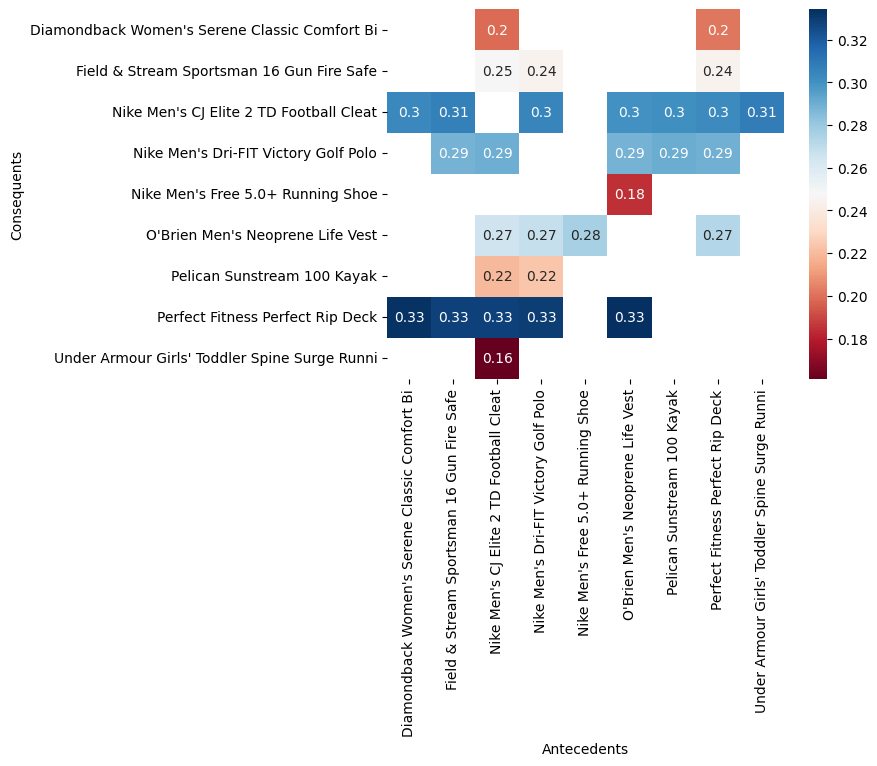

In [17]:
# Create a heatmap to visualize the correlation between items
rules_ref = rules.iloc[:30]
table = rules_ref.pivot(index='Consequents', columns='Antecedents', values = 'confidence')
table
sns.heatmap(table, annot=True, cbar=True, cmap='RdBu');

## Conclusion

Here we can analyze the result from the association rules provided. There are some interesting associations! For instance most of the high confidence metric results show the consequent being the Perfect Fitness Rip Deck. This isn't suprising because confidence will typically be high if there  is low antecedent support(showing a 'relative' purchase rate that is low) with a high consequent support. However with decent lift and conviction it would be a good idea to advertise or promote the Rip Deck if one of these antecedent items are purchased. 

The heatmap provides an essential visualization between the items with the highest leverage. It may be more interesting to look at some of these items by category. The heatmap shows shoes being correlated with shoes, It might be that we can provide a promo on buying a second pair of shoes!

A market basket analysis is relatively quick way to find insights and behavior pattern between customers!